<a href="https://colab.research.google.com/github/jgr11082003/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values in the dataset:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class 

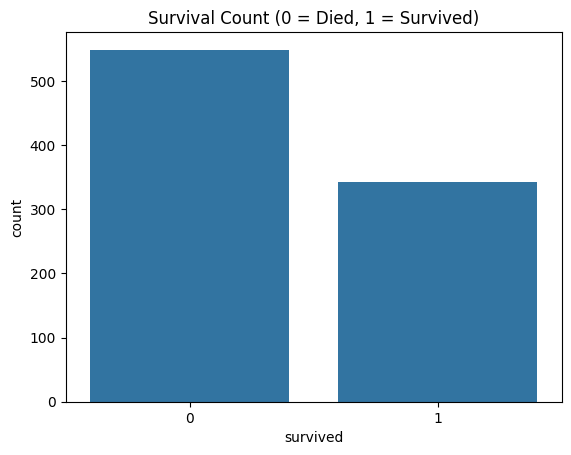

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load the Titanic dataset from Seaborn
titanic_data = sns.load_dataset('titanic')

# Display the first few rows
print("First 5 rows of the dataset:")
print(titanic_data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(titanic_data.isnull().sum())

# Visualize survival counts
sns.countplot(x='survived', data=titanic_data)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

In [10]:
# Drop unnecessary columns
titanic_data.drop(['alive', 'embark_town', 'class', 'who', 'adult_male', 'deck'], axis=1, inplace=True)

# Fill missing age values with the median
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)

# Fill missing embarked values with the mode
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

# Encode categorical variables
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})
titanic_data['embarked'] = titanic_data['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Display the preprocessed dataset
print("\nPreprocessed dataset:")
print(titanic_data.head())


Preprocessed dataset:
   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    0  22.0      1      0   7.2500         0  False
1         1       1    1  38.0      1      0  71.2833         1  False
2         1       3    1  26.0      0      0   7.9250         0   True
3         1       1    1  35.0      1      0  53.1000         0  False
4         0       3    0  35.0      0      0   8.0500         0   True


<ipython-input-10-bbb643a14a98>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
<ipython-input-10-bbb643a14a98>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [11]:
# Define features (X) and target (y)
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# Display the features and target
print("\nFeatures (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   pclass  sex   age  sibsp  parch     fare  embarked  alone
0       3    0  22.0      1      0   7.2500         0  False
1       1    1  38.0      1      0  71.2833         1  False
2       3    1  26.0      0      0   7.9250         0   True
3       1    1  35.0      1      0  53.1000         0  False
4       3    0  35.0      0      0   8.0500         0   True

Target (y):
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.2f}')


Model Accuracy: 0.83


In [13]:
# Save the trained model
joblib.dump(model, 'titanic_survival_model.pkl')

# Download the model file to your local machine
from google.colab import files
files.download('titanic_survival_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Example: Predict survival for a new passenger
new_passenger = pd.DataFrame({
    'pclass': [3],        # Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
    'sex': [0],           # Sex (0 = male, 1 = female)
    'age': [25],          # Age
    'sibsp': [1],         # Number of siblings/spouses aboard
    'parch': [0],         # Number of parents/children aboard
    'fare': [7.25],       # Fare
    'embarked': [0],       # Embarked (0 = S, 1 = C, 2 = Q)
    'alone': [0]         # Add the 'alone' feature, set to 0 or 1 as appropriate
})

# Load the saved model
model = joblib.load('titanic_survival_model.pkl')

# Make a prediction
prediction = model.predict(new_passenger)
print(f'\nPrediction for new passenger: {"Survived" if prediction[0] == 1 else "Did not survive"}')


Prediction for new passenger: Did not survive


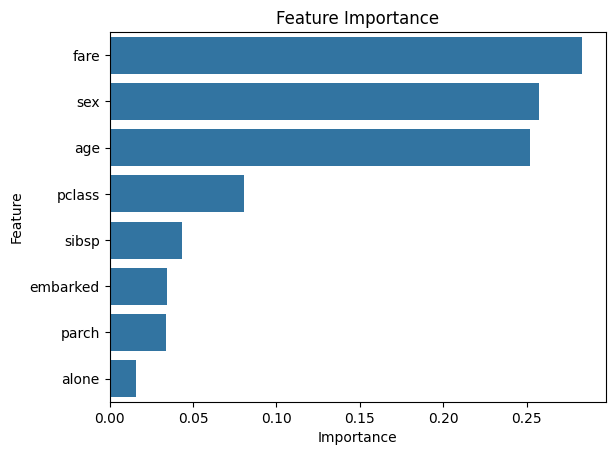

In [16]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()